<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/Module_3_4_Deforestation_Detection_using_GeoTIFF_Google_Earth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application: Deforestation Detection using GeoTIFF Images from Google Earth
This section will be a mild introduction to satellite image processing. This will help you learn about GeoTiff images and how to use this image type. In this notebook, you will learn the following:

* Reading GeoTiff images using Gdal.
* Extracting and using different bands from GeoTiff images
* Calculating Normalized Difference Vegetation Index (NDVI) using the GeoTiff Images
* Using NDVI to analyse deforestation.

The TIFF images are obtained using the Google Earth Engine. We have also provided the Notebook for generating GeoTIFF images for any region. Please check it out to do deforestation analysis of an area of your choice.

**Note:** Unless you have separately installed the GDAL python library, this notebook is best suited to run in Google Colab.

# 1. Intro to Satellite Imagery

Ever wondered how Google and Apple get data for their Maps? There are many sources for this data, however, the most common is *satellite imagery*. A number of governments and businesses around the world have imaging satellites to create these images, providing a global coverage. Satellite imaging companies sell images by licensing them to governments and businesses such as Apple Maps and Google Maps. Satellite Imagery is a powerful tool and its application is not just limited to maps. It is used in areas like meteorology, geology, oceanography, fishing, agriculture, biodiversity conservation and many more.

## 1.1 Example Satellite Imagery

Satellite imagery is so common and useful that many countries maintain their satellite imaging programs. Some of the more popular publicly accessible programs are listed below:

### LANDSAT

Landsat is the oldest continuous Earth observing satellite imaging program. Optical Landsat imagery has been collected at 30 m spatial resolution since the early 1980s. Beginning with Landsat 5, thermal infrared imagery was also collected. The Landsat 7 and Landsat 8 satellites are currently in orbit. It is a joint NASA / U.S. Geological Survey program.

In this notebook we have used **Landsat 5** (1984-2013) for our analysis. It provides images over a long period of time and is integrated with the Google Earth Engine.

[LandSat Program](https://en.wikipedia.org/wiki/Landsat_program)

### MODIS

MODIS has collected near-daily satellite imagery of the earth in 36 spectral bands since 2000. MODIS is on board the NASA Terra and Aqua satellites.

[MODIS instrument](https://modis.gsfc.nasa.gov/about/)

### Sentinel

The European Space Agency is currently developing the Sentinel constellation of satellites. Currently, 7 missions are planned, each for a different application. Sentinel-1 (SAR imaging), Sentinel-2 (decameter optical imaging for land surfaces), and Sentinel-3 (hectometer optical and thermal imaging for land and water) have already been launched.

[Sentinel website](https://sentinel.esa.int/)

### More information
To generally learn more about Satellite Imagery, check out [the wikipedia article](https://en.wikipedia.org/wiki/Satellite_imagery)

## 1.2 TIFF vs GeoTIFF

Tagged Image File Format (TIFF) is a variable-resolution bitmapped image format. TIFF files are large and of very high quality. These are common for storing raster graphics images, popular among graphic artists, the publishing industry and photographers. TIFF files can contain tags, additional items of information, that can be used to extend the standard for different purposes.

GeoTIFF is nothing but a TIFF file with additional tags that provide extra information for that image as specified by the GeoTIFF standard. Hence, it allows georeferencing information to be embedded within a TIFF file. In other words, it is metadata along with TIFF file.

[Wikipedia Article on TIFF](https://en.wikipedia.org/wiki/TIFF)

[Wikipedia Article on GeoTIFF](https://en.wikipedia.org/wiki/GeoTIFF)

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob
plt.rcParams['image.cmap'] = 'gray'
from osgeo import gdal

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/s1bc9bnavqx9ryo/AABFVq9q_73nOcZ4T05k40rga?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
    %cd Applications
else:
    pass

In [ ]:
!wget https://www.dropbox.com/sh/pdxcqqpkid1uaea/AABBkME1VWGbUj-m49sXsNdWa?dl=1 -O deforestation.zip
!unzip deforestation.zip

# 2. Geospatial Data Abstraction Library (GDAL)
GDAL is a translator library for raster and vector geospatial data formats. The GDAL python package includes a number of tools for programming and manipulating the Geospatial Data Abstraction Library.

One concept to understand is a **raster band**. Most color images have 3 raster bands, representing the b, g, and r components describing light intensities. However, a raster band could be any spatially coincident matrices of cell values representing the same spatial area, not just channel brightness information.

[GDAL documentation](https://gdal.org/api/python/osgeo.gdal.html)

<hr style='border:none; height: 4px; background-color:#D3D3D3'/>

## 2.1 Opening Geotiff File

`Open()` allows you to open a reference to a GeoTIFF file so you can later extract any raster bands you like.

### Function Syntax
``` python
dataset = gdal.Open( filename )
```

The function has **1 required input argument**:

1. `filename` path of file to open.


### Documentation

[**`Open()`**](https://gdal.org/tutorials/raster_api_tut.html)
<hr style='border:none; height: 4px; background-color:#D3D3D3'/>

In [ ]:
ds = gdal.Open('2001api.tif')

<hr style='border:none; height: 4px; background-color:#D3D3D3'/>

## 2.2 Fetching a Raster Band

Raster data via GDAL is done one band at a time. `GetRasterBand()` allows to extract a single raster band from the GeoTiff image.

### Function Syntax
``` python
band = dataset.GetRasterBand( n )
```

The function has **1 required input argument**:

1. `n` the channel number to be extracted


### Documentation

[**`GetRasterBand()`**](https://gdal.org/tutorials/raster_api_tut.html)

<hr style='border:none; height: 4px; background-color:#D3D3D3'/>

### 2.2.1 <font style='color:rgb(50,120,230)'>Extract the various bands from the GeoTIFF Image</font>
There are 7 bands in the Landsat5 image data. They are:

1. Blue
2. Green
3. Red
4. Near Infrared (NIR)
5. Short-wave Infrared (SWIR) 1
6. Thermal
7. Short-wave Infrared (SWIR) 2

Let us see how they look like.

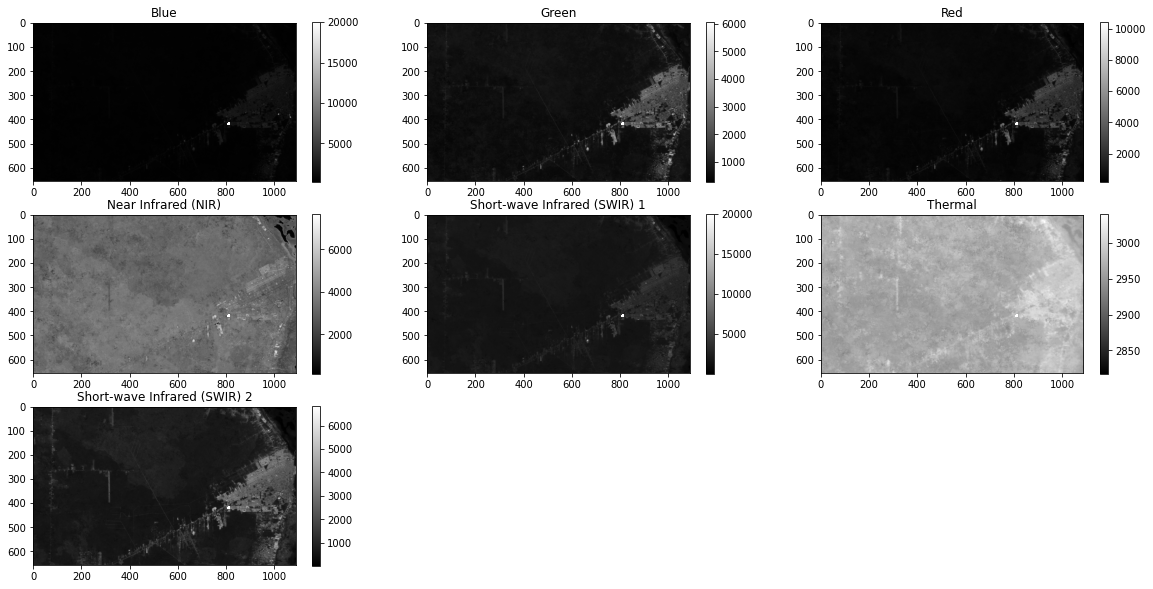

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(331); plt.imshow(ds.GetRasterBand(1).ReadAsArray()); plt.title("Blue"); plt.colorbar();
plt.subplot(332); plt.imshow(ds.GetRasterBand(2).ReadAsArray()); plt.title("Green"); plt.colorbar();
plt.subplot(333); plt.imshow(ds.GetRasterBand(3).ReadAsArray()); plt.title("Red"); plt.colorbar();
plt.subplot(334); plt.imshow(ds.GetRasterBand(4).ReadAsArray()); plt.title("Near Infrared (NIR)"); plt.colorbar();
plt.subplot(335); plt.imshow(ds.GetRasterBand(5).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 1"); plt.colorbar();
plt.subplot(336); plt.imshow(ds.GetRasterBand(6).ReadAsArray()); plt.title("Thermal"); plt.colorbar();
plt.subplot(337); plt.imshow(ds.GetRasterBand(7).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 2"); plt.colorbar();

# 3 Normalized Difference Vegetation Index (NDVI)
**Normalized difference vegetation index** or NDVI is an index that is used to demonstrate the difference between the visible and near-infrared reflectance of vegetation cover and **can be used to estimate the density of green on an area of land.** <br>
The NDVI is calculated as: <br>
``` math
 NDVI = (NIR - RED) / (NIR  + RED)
 ```
 where `Red` and `NIR` stand for the spectral reflectance measurements acquired in the red (visible) and near-infrared regions, respectively. The NDVI score for an area with vegetation should lie between 0.3 ( light vegetation ) to 0.8 ( heavy vegetation ). Clouds will have a negative index, while soil and bodies of water will have low positive values. We will use this information to estimate the vegetation of a certain region.

## 3.1 Near Infra Red Region (NIR)

**NIR** has a wavelength of 0.76 - 0.90 µm. Plant life absorbs visible light from 0.4 µm (blue light) and up to 0.7 µm (red light) for photosynthesis, with peak absorption towards both ends of this spectrum. We see plants as green because they typically don't absorb the green wavelengths of light (~0.5 µm) in the middle of this range. However, this does make the green channel less accurate for detection of vegetation because it falls within the full range of wavelengths used for photosynthesis. On the other hand, plants strongly reflects near-infrared light (from 0.7 to 1.1 µm). This fact is exploited in calculating NDVI.

## 3.2 Calculate the NDVI from Landsat5 Images</font>
The NDVI is calculated from the Red and NIR Bands. In LandSat5, these are the 3rd and 4th bands. So, we will use GDAL to get those bands and calculate NDVI.

In [ ]:
def get_NDVI(ds):
    r = ds.GetRasterBand(3).ReadAsArray()
    nir = ds.GetRasterBand(4).ReadAsArray()
    ndvi = (nir - r)/(nir + r)
    ndvi = normalize255(ndvi)
    return ndvi

### 3.2.1 <font style='color:rgb(50,120,230)'>Normalize ndvi from (-1, 1) to (0, 255)

In [ ]:
def normalize255(ndvi):
    ndvi = ndvi + 1
    ndvi = (ndvi / 2) * 255
    return ndvi

### 3.2.2 <font style='color:rgb(50,120,230)'>Get Segmented mask of NDVI</font>
As discussed earlier, The NDVI score for an area with vegetation should lie between 0.3 ( light vegetation ) to 0.8 ( heavy vegetation ). Since we have normalized the values to (0, 255), these correspond to 165 and 230.

We will use 200 ( midway between 0.3 and 0.8 ) as our threshold to estimate forest area.


In [ ]:
 def get_NDVI_mask(ndvi):
    _, mask = cv2.threshold(ndvi, 200, 255, cv2.THRESH_BINARY)
    return mask

### 3.2.3 <font style='color:rgb(50,120,230)'>Calculate the percentage of forestation using the generated mask</font>

In [ ]:
def percent_forest(mask):
    c = cv2.countNonZero(mask)
    t = mask.shape[0] * mask.shape[1]
    return round((c / t) * 100, 4)

## 3.3 Calculate and Plot NDVI and segmented mask</font>
We will use this function to plot the NDVI and the mask generated for forest area and display the results.

In [ ]:
def plot_NDVI(path):
    ds = gdal.Open(path)
    ndvi = get_NDVI(ds)
    ndvi_mask = get_NDVI_mask(ndvi)

    year = path.split('.')[0][:4]
    fig = plt.figure(figsize = (20, 5))
    fig = plt.subplot(1, 2, 1)
    plot = plt.imshow(ndvi, cmap = "gray")
    plt.colorbar()
    plt.title(year + ": " + "NDVI")
    plt.xticks([]), plt.yticks([])
    fig = plt.subplot(1, 2, 2)
    plot = plt.imshow(ndvi_mask, cmap = "gray");
    plt.title(str(percent_forest(ndvi_mask)) + "%")
    plt.xticks([]), plt.yticks([])
    plt.show()

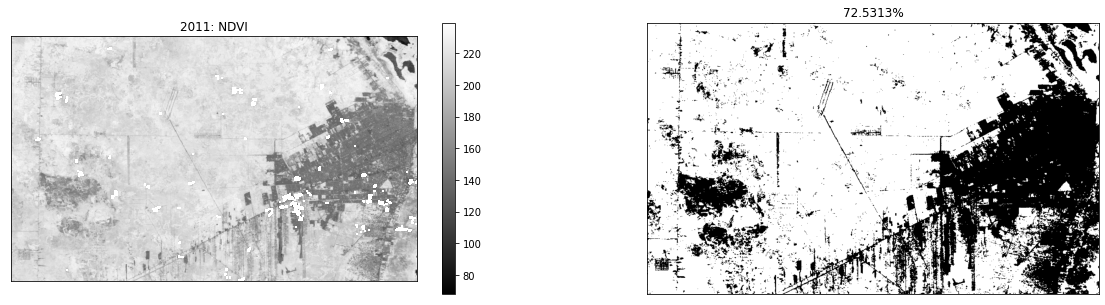

In [ ]:
plot_NDVI('2011api.tif')

## 3.4 Plotting all years of data

The White portion in the Mask demonstrates the Forested sections of the area based on NDVI.

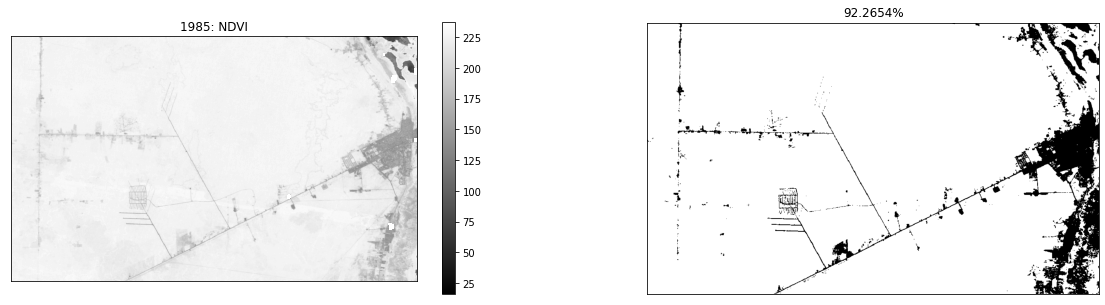

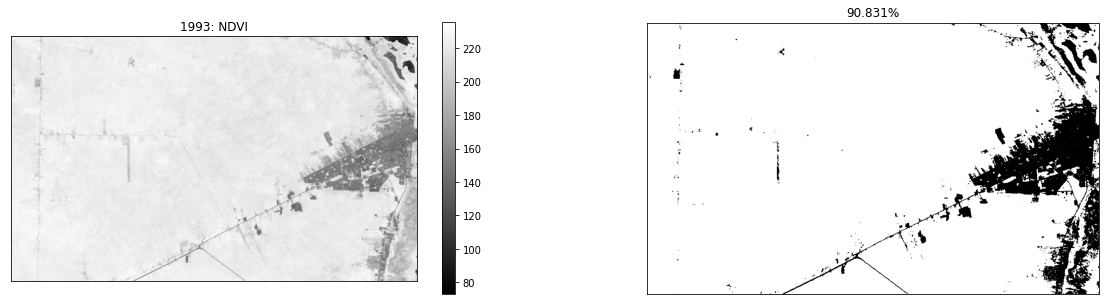

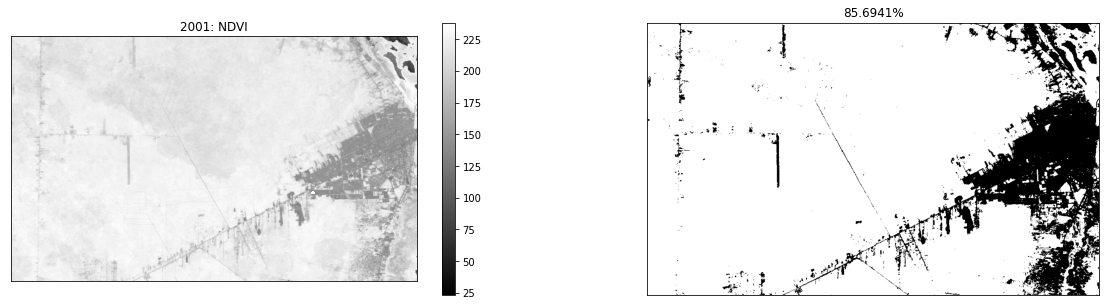

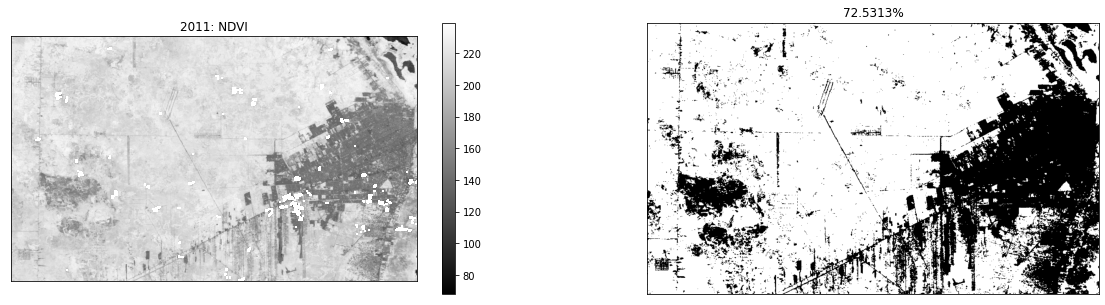

In [ ]:
geotiff_files = glob.glob("*.tif")
geotiff_files.sort()
for file in geotiff_files:
    plot_NDVI(file)

# Conclusion
As you can see, being able to read and interpret satellite Imagery is an incredibly powerful tool. As an extension, consider trying to do the above or similar analysis on an area of your own choice!